In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Creating Features

Feature engineering is taking raw data and extracting meaningful features from that data.

In [2]:
stack = pd.read_csv('/Users/Dillon/OneDrive/Documents/DataCampML/Combined_DS_v10.csv')

In [3]:
stack.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


## Checking and Selecting by dtypes

In [4]:
stack.dtypes

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object

In [5]:
# To select a subset of datatypes
floats = stack.select_dtypes(include = ['float'])
floats.columns

Index(['ConvertedSalary', 'StackOverflowJobsRecommend'], dtype='object')

## Handling Categorical Data

Qualitative data are not machine readable.
- Better to encode using binary methods. 0 for red, 1 for not red.
    - One-hot
    - Dummy

In [6]:
pd.get_dummies(stack, columns = ['FormalEducation'], drop_first= True).head()

,SurveyDate,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,FormalEducation_Bachelor's degree (BA. BS. B.Eng.. etc.),FormalEducation_I never completed any formal education,FormalEducation_Master's degree (MA. MS. M.Eng.. MBA. etc.),FormalEducation_Other doctoral degree (Ph.D. Ed.D.. etc.),FormalEducation_Primary/elementary school,FormalEducation_Professional degree (JD. MD. etc.),FormalEducation_Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.),FormalEducation_Some college/university study without earning a degree
0,2/28/18 20:20,NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN,1,0,0,0,0,0,0,0
1,6/28/18 13:26,70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",1,0,0,0,0,0,0,0
2,6/6/18 3:37,NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN,1,0,0,0,0,0,0,0
3,5/9/18 1:06,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,0,0,1
4,4/12/18 22:41,41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00",1,0,0,0,0,0,0,0


One large issue with dummy encoding is that the more variables in the category the more columns will be created. Here's a clever trick to get around this: 

In [7]:
# Check the amount of times each category presents itself in the column
counts = stack['FormalEducation'].value_counts()
counts

Bachelor's degree (BA. BS. B.Eng.. etc.)                                              482
Master's degree (MA. MS. M.Eng.. MBA. etc.)                                           241
Some college/university study without earning a degree                                130
Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.)     58
Associate degree                                                                       33
Other doctoral degree (Ph.D. Ed.D.. etc.)                                              30
Professional degree (JD. MD. etc.)                                                     19
Primary/elementary school                                                               5
I never completed any formal education                                                  1
Name: FormalEducation, dtype: int64

In [8]:
# Lets change all values that are less than 100 to 'Other'
mask = stack['FormalEducation'].isin(counts[counts < 100].index)
print(mask)
stack['FormalEducation'][mask] = 'Other'
stack['FormalEducation'].value_counts()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: FormalEducation, Length: 999, dtype: bool


<ipython-input-8-4bef9c5685f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stack['FormalEducation'][mask] = 'Other'


Bachelor's degree (BA. BS. B.Eng.. etc.)                  482
Master's degree (MA. MS. M.Eng.. MBA. etc.)               241
Other                                                     146
Some college/university study without earning a degree    130
Name: FormalEducation, dtype: int64

## Handling Numeric Variables

In [9]:
rest = pd.DataFrame({
    'Restuarants': ['Rest1', 'Rest2', 'Rest3'],
    'Violations': [4, 0, 1]
})

rest

,Restuarants,Violations
0,Rest1,4
1,Rest2,0
2,Rest3,1


In [10]:
# Instead of having multiple values, lets change it from 
# 1 if you've had any violation, and 0 if you haven't.

rest['BinaryViolations'] = 0
rest.loc[rest['Violations'] > 0, 'BinaryViolations'] = 1
rest.drop(labels = 'Violations', axis = 1, inplace=True)
rest


,Restuarants,BinaryViolations
0,Rest1,1
1,Rest2,0
2,Rest3,1


If we want to extend the above functionality to more than two cases we can bin. 

In [11]:
stack['BinnedAges'] = pd.cut(
    stack.Age, 
    bins = [-np.inf, 0, 15, 30, 45, 60, np.inf], 
    labels = ['Baby', 'Young', 'Young Adult', 'Mid', 'Old', 'Oldest']
)
stack['BinnedAges'].head()

0    Young Adult
1            Mid
2            Mid
3            Old
4            Mid
Name: BinnedAges, dtype: category
Categories (6, object): ['Baby' < 'Young' < 'Young Adult' < 'Mid' < 'Old' < 'Oldest']

In [12]:
# Bins can also be assigned a number for how many bins we want. 
stack['OtherAges'] = pd.cut(
    stack.Age,
    bins = 5,
    labels = ['Baby', 'Young', 'Adult', 'Old', 'Dead']
)

stack['OtherAges'].head()

0     Baby
1    Young
2    Adult
3    Adult
4    Young
Name: OtherAges, dtype: category
Categories (5, object): ['Baby' < 'Young' < 'Adult' < 'Old' < 'Dead']

# Dealing with Messy Data

## Why do missing values exist?

- Sensor error
- Surveys not being filled out fully
- Data intnetially being omitted
- Lots and lots of reasons

Needs to be addressed as most models can't handle missing data. 

In [13]:
# To check nans
stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SurveyDate                  999 non-null    object  
 1   FormalEducation             999 non-null    object  
 2   ConvertedSalary             665 non-null    float64 
 3   Hobby                       999 non-null    object  
 4   Country                     999 non-null    object  
 5   StackOverflowJobsRecommend  487 non-null    float64 
 6   VersionControl              999 non-null    object  
 7   Age                         999 non-null    int64   
 8   Years Experience            999 non-null    int64   
 9   Gender                      693 non-null    object  
 10  RawSalary                   665 non-null    object  
 11  BinnedAges                  999 non-null    category
 12  OtherAges                   999 non-null    category
dtypes: category(2), floa

In [14]:
# To check the amount of misisng values
stack.isnull().sum()

SurveyDate                      0
FormalEducation                 0
ConvertedSalary               334
Hobby                           0
Country                         0
StackOverflowJobsRecommend    512
VersionControl                  0
Age                             0
Years Experience                0
Gender                        306
RawSalary                     334
BinnedAges                      0
OtherAges                       0
dtype: int64

## Dealing with Missing Values (I)

In [15]:
# Using listwise deletion: 
stack.dropna(how = 'any').shape

# We've dropped a huge amount of data here. 

(264, 13)

In [16]:
# Dropping only on a certain column
stack.dropna(subset = ['ConvertedSalary']).shape

(665, 13)

Is nearly always better to fill in the values with a new value. 

In [17]:
stack['ConvertedSalary'].fillna(value = 'Not Given', inplace = True)
stack['ConvertedSalary'].head()

0    Not Given
1      70841.0
2    Not Given
3      21426.0
4      41671.0
Name: ConvertedSalary, dtype: object

If we only care about the presence or absence of data:

In [18]:
# Reload fresh stack
stack = pd.read_csv('/Users/Dillon/OneDrive/Documents/DataCampML/Combined_DS_v10.csv')

In [19]:
stack['Salary'] = stack['ConvertedSalary'].notnull()
stack['Salary'].head()

0    False
1     True
2    False
3     True
4     True
Name: Salary, dtype: bool

## Dealing with Missing Values (II)

Better to replace numeric nans with mean or medians. 

In [20]:
stack['ConvertedSalary'].fillna(round(stack['ConvertedSalary'].mean()), inplace = True)
stack['ConvertedSalary'].head()

0    92565.0
1    70841.0
2    92565.0
3    21426.0
4    41671.0
Name: ConvertedSalary, dtype: float64

# Conforming to Statistical Assumptions

Almost all models (except for tree based models) require data to be on the same scale (normally distributed).

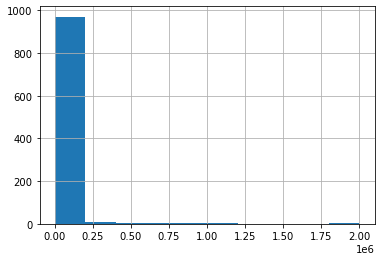

In [21]:
stack['ConvertedSalary'].hist()
plt.show()

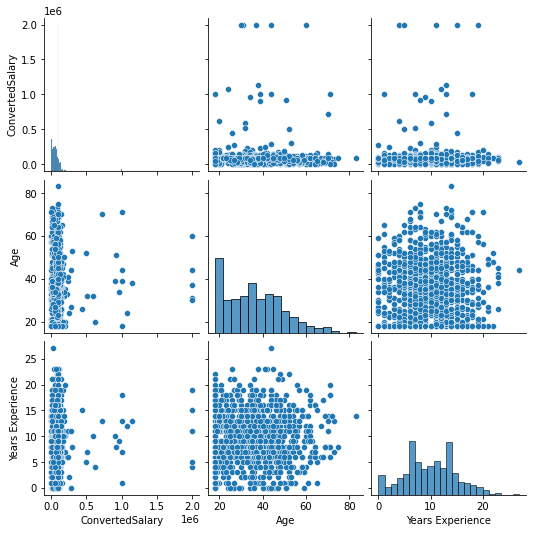

In [25]:
sns.pairplot(stack[['ConvertedSalary', 'Age', 'Years Experience']])
plt.show()

## Scaling and Transformations

Without scaling:

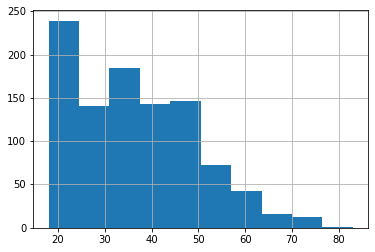

In [26]:
stack['Age'].hist()
plt.show()

Applying a scaler:

In [30]:
scaler = StandardScaler()

scaler.fit(stack[['Age']])

stack['Normal Age'] = scaler.transform(stack[['Age']])

With Scaling:

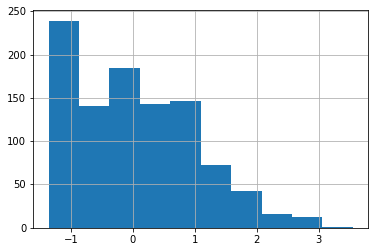

In [31]:
stack['Normal Age'].hist()
plt.show()

## Log Transformations

Best used on skewed data.

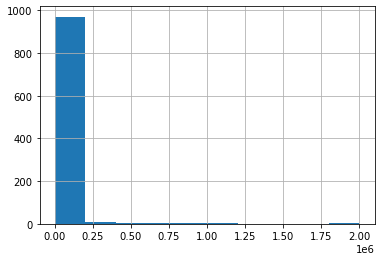

In [32]:
stack['ConvertedSalary'].hist()
plt.show()

In [34]:
log = PowerTransformer()
log.fit(stack[['ConvertedSalary']])

stack['Log Salary'] = log.transform(stack[['ConvertedSalary']])

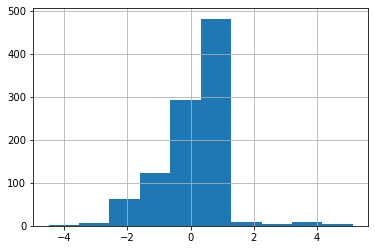

In [35]:
stack['Log Salary'].hist()
plt.show()

## Removing Outliers

Outliers in your data are outside the IQR. They'll cause skews. 

### Cutoffs using quantiles:

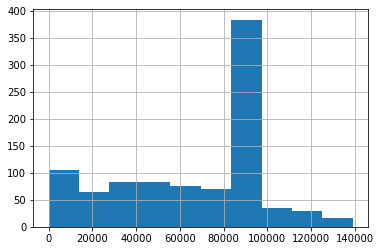

In [39]:
cutoff = stack['ConvertedSalary'].quantile(0.95)
mask = stack['ConvertedSalary'] < cutoff

cut_stack = stack[mask]
cut_stack['ConvertedSalary'].hist()
plt.show()

### Cutoffs using standard deviations:

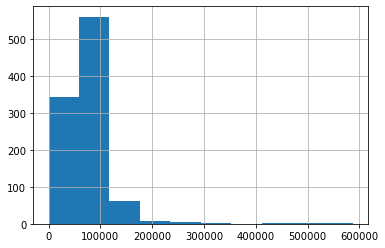

In [40]:
mean = stack['ConvertedSalary'].mean()
std = stack['ConvertedSalary'].std()

cutoff = std*3

lower, upper = mean - cutoff, mean + cutoff

stat_stack = stack[
    (stack['ConvertedSalary'] < upper) & (stack['ConvertedSalary'] > lower)
]

stat_stack['ConvertedSalary'].hist()
plt.show()

_Always transform the test data. NEVER FIT. You must apply the same transformation._

# Dealing with Text Data

Text data isn't tabular, it's unstructured. We need to transform it so that it's machine readable. 

In [41]:
speech = pd.read_csv('/Users/Dillon/OneDrive/Documents/DataCampML/inaugural_speeches.csv')

In [42]:
speech.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


In [45]:
# Pulling out one 'text'
speech.iloc[0,-1]

'Fellow-Citizens of the Senate and of the House of Representatives:  AMONG the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the   th day of the present month. On the one hand, I was summoned by my country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years<U+0097>a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could n

In [46]:
# Remove all non-letter characters from 'text' using regular expressions
speech['text'] = speech['text'].str.replace('[^a-zA-z]', ' ')

<ipython-input-46-d6f65809d37f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  speech['text'] = speech['text'].str.replace('[^a-zA-z]', ' ')


In [47]:
speech.iloc[0,-1]

'Fellow Citizens of the Senate and of the House of Representatives   AMONG the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order  and received on the   th day of the present month  On the one hand  I was summoned by my country  whose voice I can never hear but with veneration and love  from a retreat which I had chosen with the fondest predilection  and  in my flattering hopes  with an immutable decision  as the asylum of my declining years U      a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination  and of frequent interruptions in my health to the gradual waste committed on it by time  On the other hand  the magnitude and difficulty of the trust to which the voice of my country called me  being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications  could n

In [48]:
# Standardise:
speech['text'] = speech['text'].str.lower()

## Word Counts

With words as columns, and rows as sentences.

In [58]:
cv = CountVectorizer(min_df = 0.1, max_df = 0.9) # Far too many words to analyse. Elimates most rare and  most frequent words
cv.fit(speech['text'])
cv_transformed = cv.transform(speech['text'])

data = cv_transformed.toarray()
columns = cv.get_feature_names()

In [60]:
speech_new = pd.concat([speech,pd.DataFrame(data = data, columns = columns)], axis = 1, sort = False)

In [62]:
speech_new.head()

,Name,Inaugural Address,Date,text,abandon,abiding,ability,able,about,above,...,year,years,yes,yet,yield,you,young,your,zeal,zealously
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellow citizens of the senate and of the house...,0,0,0,0,0,0,...,0,1,0,0,0,5,0,9,0,0
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens i am again called upon by th...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,John Adams,Inaugural Address,"Saturday, March 4, 1797",when it was first perceived in early times t...,0,0,0,0,0,0,...,2,3,0,0,0,0,0,1,1,0
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",friends and fellow citizens called upon to u...,1,0,0,0,1,1,...,0,0,0,2,0,7,0,7,1,0
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805",proceeding fellow citizens to that qualifica...,0,0,0,1,0,0,...,2,2,0,2,0,4,0,4,3,0


## Term frequencey-inverse document frequency

Tf-idf is a better method to vectorizing words than just the counts of words. Very common words will overpower the model. 

A = (Count of word occurances)/(Total words in document)

B = (Numer of docs word is in)/(Total number of docs)

Tf-idf = A/log(B)

It reduces the value of common words. 

In [70]:
tvec = TfidfVectorizer(max_features = 100, stop_words = 'english') # Ignores common English words

trained_speech = tvec.fit_transform(speech['text'])

data = trained_speech.toarray()
columns = tvec.get_feature_names()

In [73]:
tvec_data = pd.DataFrame(data = data, columns = columns).add_prefix('TFIDF_')
tvec_data.head()

,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_americans,TFIDF_believe,TFIDF_best,TFIDF_better,TFIDF_change,TFIDF_citizens,...,TFIDF_things,TFIDF_time,TFIDF_today,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.000000,0.133415,0.000000,0.105388,0.0,0.000000,0.000000,0.000000,0.000000,0.229644,...,0.000000,0.045929,0.0,0.136012,0.203593,0.000000,0.060755,0.000000,0.045929,0.052694
1,0.000000,0.261016,0.266097,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.179712,...,0.000000,0.000000,0.0,0.000000,0.199157,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.092436,0.157058,0.073018,0.0,0.000000,0.026112,0.060460,0.000000,0.106072,...,0.032030,0.021214,0.0,0.062823,0.070529,0.024339,0.000000,0.000000,0.063643,0.073018
3,0.000000,0.092693,0.000000,0.000000,0.0,0.090942,0.117831,0.045471,0.053335,0.223369,...,0.048179,0.000000,0.0,0.094497,0.000000,0.036610,0.000000,0.039277,0.095729,0.000000
4,0.041334,0.039761,0.000000,0.031408,0.0,0.000000,0.067393,0.039011,0.091514,0.273760,...,0.082667,0.164256,0.0,0.121605,0.030338,0.094225,0.000000,0.000000,0.054752,0.062817


In [74]:
trained_speech_new = pd.concat([speech, tvec_data], axis = 1, sort= False)
trained_speech_new.head()

,Name,Inaugural Address,Date,text,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_americans,TFIDF_believe,...,TFIDF_things,TFIDF_time,TFIDF_today,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellow citizens of the senate and of the house...,0.000000,0.133415,0.000000,0.105388,0.0,0.000000,...,0.000000,0.045929,0.0,0.136012,0.203593,0.000000,0.060755,0.000000,0.045929,0.052694
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens i am again called upon by th...,0.000000,0.261016,0.266097,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.199157,0.000000,0.000000,0.000000,0.000000,0.000000
2,John Adams,Inaugural Address,"Saturday, March 4, 1797",when it was first perceived in early times t...,0.000000,0.092436,0.157058,0.073018,0.0,0.000000,...,0.032030,0.021214,0.0,0.062823,0.070529,0.024339,0.000000,0.000000,0.063643,0.073018
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",friends and fellow citizens called upon to u...,0.000000,0.092693,0.000000,0.000000,0.0,0.090942,...,0.048179,0.000000,0.0,0.094497,0.000000,0.036610,0.000000,0.039277,0.095729,0.000000
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805",proceeding fellow citizens to that qualifica...,0.041334,0.039761,0.000000,0.031408,0.0,0.000000,...,0.082667,0.164256,0.0,0.121605,0.030338,0.094225,0.000000,0.000000,0.054752,0.062817


In [76]:
# Check common words in first speech
trained_speech_new.iloc[0, 4:-1].sort_values(ascending=False)

TFIDF_government     0.36743
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_citizens      0.229644
                      ...   
TFIDF_political          0.0
TFIDF_god                0.0
TFIDF_general            0.0
TFIDF_freedom            0.0
TFIDF_action             0.0
Name: 0, Length: 99, dtype: object

In [79]:
# Obama's Speech
trained_speech_new.iloc[-2, 4:].sort_values(ascending=False)

TFIDF_america       0.305814
TFIDF_people        0.269882
TFIDF_time           0.25817
TFIDF_today         0.253538
TFIDF_equal           0.2126
                      ...   
TFIDF_order              0.0
TFIDF_place              0.0
TFIDF_policy             0.0
TFIDF_political          0.0
TFIDF_confidence         0.0
Name: 56, Length: 100, dtype: object

In [78]:
# Trump's Speech
trained_speech_new.iloc[-1, 4:].sort_values(ascending=False)

TFIDF_america         0.678762
TFIDF_american        0.289264
TFIDF_people          0.217821
TFIDF_nation          0.206285
TFIDF_country         0.206285
                        ...   
TFIDF_peace                0.0
TFIDF_constitution         0.0
TFIDF_place                0.0
TFIDF_policy               0.0
TFIDF_duties               0.0
Name: 57, Length: 100, dtype: object

## N-grams

N-grams are unlike TFIDF as they group words together. When TFIDF isolates words they lose their meaning.

In [91]:
tv_gram = TfidfVectorizer(ngram_range = (4,4)) # Min and max range of ngram.

gram_trans = tv_gram.fit_transform(speech['text'])

gram_data = gram_trans.toarray()
columns = tv_gram.get_feature_names()

In [92]:
speech_gram = pd.concat([speech, pd.DataFrame(data = gram_data, columns = columns)], axis = 1, sort = False)

In [93]:
# Obama's Speech
speech_gram.iloc[-2, 4:].sort_values(ascending= False)

our journey is not               0.107844
is not complete until            0.107844
journey is not complete          0.107844
people still believe that        0.064706
we the people still              0.064706
                                   ...   
headlines in the neighborhood         0.0
heading toward mars it                0.0
heading my pledge he                  0.0
headedness will not so                0.0
zone and extending through            0.0
Name: 56, Length: 124908, dtype: object

In [94]:
# Trumps's Speech
speech_gram.iloc[-1, 4:].sort_values(ascending= False)

we will make america          0.129395
will bring back our           0.103516
we will bring back            0.103516
again we will make            0.077637
have not been your            0.051758
                                ...   
he has initiated should            0.0
he has given to                    0.0
he has given our                   0.0
he has endowed them                0.0
zone and extending through         0.0
Name: 57, Length: 124908, dtype: object